<a href="https://colab.research.google.com/github/amirkasaei/K-Nearest-Neighbors-with-scikit-learn/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Importing Required Libraries**

#### **load the required libraries**

In [113]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from math import sqrt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

#### **set GPU**

In [114]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# **Loading Data**

In [115]:
abalone_columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [116]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

In [117]:
abalone = pd.read_csv(url, names=abalone_columns)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [118]:
abalone.shape

(4177, 9)

#### **encode dataset**

In [119]:
le = LabelEncoder()

abalone[['Sex']] = abalone[['Sex']].apply(le.fit_transform, axis=0)

abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### **Data Correlation**

In [120]:
correlation_matrix = abalone.corr()
correlation_matrix

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# **helper function**

In [121]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
  print(f'{dom} Confusion matrix')
  cf = confusion_matrix(y_train_pred,y_train)
  sns.heatmap(cf,annot=True,yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
  plt.tight_layout()
  plt.show()

# **Classification**

## **Sex**

### **Feature Selection**

In [71]:
classes = le.classes_
classes

array(['F', 'I', 'M'], dtype=object)

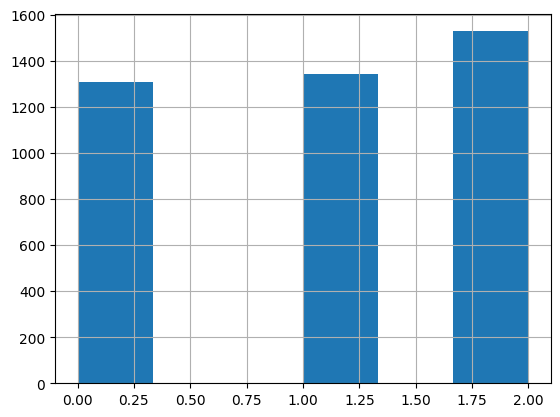

In [72]:
abalone['Sex'].hist(bins=6)
plt.show()

In [73]:
pd.DataFrame(correlation_matrix["Sex"])

,Sex
Sex,1.000000
Length,-0.036066
Diameter,-0.038874
Height,-0.042077
Whole weight,-0.021391
Shucked weight,-0.001373
Viscera weight,-0.032067
Shell weight,-0.034854
Rings,-0.034627


**divide given columns into two types of variables (target variable and feature variables).**

In [74]:
x = abalone[abalone_columns[1:]]
y = abalone['Sex']
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### **Splitting Data**
80% train and 20% test

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### **Best K**

In [76]:
k_values = [i for i in range (1,100)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    score = cross_val_score(knn, x, y, cv=10)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

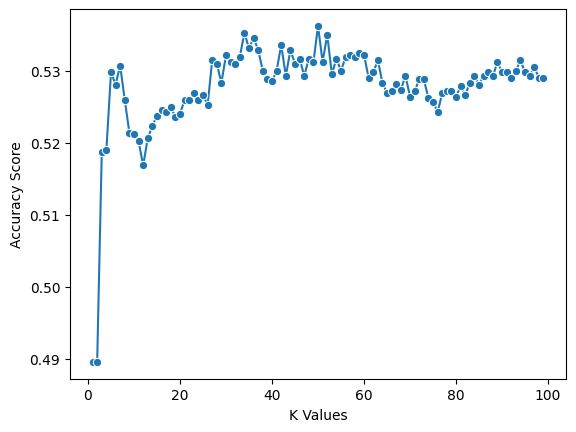

In [77]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [78]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
print('best K:', best_k)

best K: 50


### **Model**

In [80]:
scoring = {'accuracy' : make_scorer(precision_score, average = 'weighted'),
           'precision' : make_scorer(precision_score, average = 'weighted'),
           'recall' : make_scorer(recall_score, average = 'weighted'),
           'f1_score' : make_scorer(f1_score, average = 'weighted')}

In [81]:
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
score = cross_validate(knn, x, y, cv=10, scoring=scoring)

In [82]:
score

{'fit_time': array([0.01085758, 0.00731945, 0.00446844, 0.00476193, 0.00451684,
        0.00505471, 0.0041883 , 0.00420213, 0.00424337, 0.00412178]),
 'score_time': array([0.01464343, 0.01534748, 0.0150795 , 0.01463819, 0.01282144,
        0.01447558, 0.01315808, 0.01238942, 0.01385331, 0.01329947]),
 'test_accuracy': array([0.41133712, 0.56215274, 0.53364591, 0.58124657, 0.54180669,
        0.47315884, 0.57878393, 0.50074827, 0.55059157, 0.54605788]),
 'test_precision': array([0.41133712, 0.56215274, 0.53364591, 0.58124657, 0.54180669,
        0.47315884, 0.57878393, 0.50074827, 0.55059157, 0.54605788]),
 'test_recall': array([0.4138756 , 0.57177033, 0.5645933 , 0.58133971, 0.53827751,
        0.48325359, 0.59808612, 0.49880096, 0.56115108, 0.55155875]),
 'test_f1_score': array([0.41187766, 0.55045691, 0.53916894, 0.57144886, 0.53684557,
        0.4766861 , 0.5758285 , 0.49790508, 0.554181  , 0.54684584])}

In [83]:
avg_accuracy = np.mean(score['test_accuracy'])
avg_precision = np.mean(score['test_precision'])
avg_recall = np.mean(score['test_recall'])
avg_f1_score = np.mean(score['test_f1_score'])
print('average accuracy=', avg_accuracy, '\naverage precision=', avg_precision, '\naverage recall=', avg_recall, '\naverage f1-score=', avg_f1_score)

average accuracy= 0.5279529515708432 
average precision= 0.5279529515708432 
average recall= 0.5362706963615711 
average f1-score= 0.5261244467243432


In [84]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')

In [85]:
print('accuracy=', accuracy, '\nprecision=', precision, '\nrecall=', recall, '\nf1-score=', f1_score)

accuracy= 0.5514354066985646 
precision= 0.5399572378800901 
recall= 0.5514354066985646 
f1-score= 0.5425376955354868


## **Rings**

### **Feature Selection**

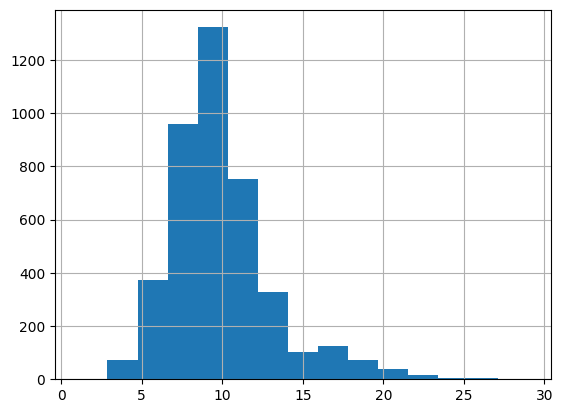

In [122]:
abalone["Rings"].hist(bins=15)
plt.show()

In [123]:
np.unique(abalone["Rings"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29])

In [124]:
pd.DataFrame(correlation_matrix["Rings"])

,Rings
Sex,-0.034627
Length,0.556720
Diameter,0.574660
Height,0.557467
Whole weight,0.540390
Shucked weight,0.420884
Viscera weight,0.503819
Shell weight,0.627574
Rings,1.000000


**divide given columns into two types of variables (target variable and feature variables).**

In [125]:
x = abalone[abalone_columns[:-1]]
y = abalone['Rings']
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


### **Splitting Data**
80% train and 20% test

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### **Best K**

In [ ]:
k_values = [i for i in range (1,100)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    score = cross_val_score(knn, x, y, cv=10)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

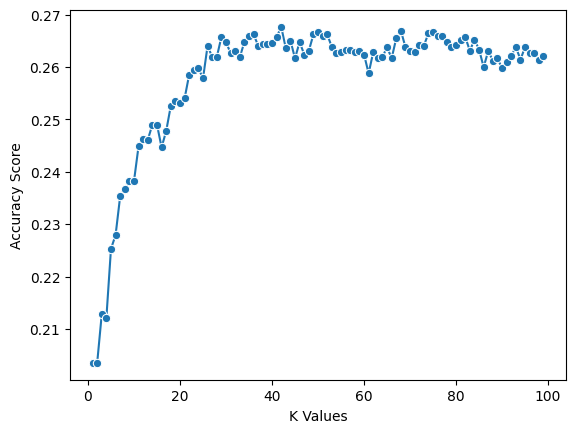

In [109]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [110]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
print('best K:', best_k)

best K: 42


### **Model**

In [127]:
scoring = {'accuracy' : make_scorer(precision_score, average = 'weighted'),
           'precision' : make_scorer(precision_score, average = 'weighted'),
           'recall' : make_scorer(recall_score, average = 'weighted'),
           'f1_score' : make_scorer(f1_score, average = 'weighted')}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
score = cross_validate(knn, x, y, cv=10, scoring=scoring)

In [129]:
score

{'fit_time': array([0.00968194, 0.00487924, 0.00671506, 0.00453615, 0.00448561,
        0.00435543, 0.0043025 , 0.00674987, 0.00439525, 0.00500798]),
 'score_time': array([0.02049398, 0.0177834 , 0.01869488, 0.01720381, 0.01559186,
        0.01689315, 0.02305722, 0.01794004, 0.02558088, 0.01846313]),
 'test_accuracy': array([0.20764411, 0.21668281, 0.23185228, 0.25432723, 0.22688254,
        0.20667168, 0.28147426, 0.24119667, 0.2478327 , 0.32817247]),
 'test_precision': array([0.20764411, 0.21668281, 0.23185228, 0.25432723, 0.22688254,
        0.20667168, 0.28147426, 0.24119667, 0.2478327 , 0.32817247]),
 'test_recall': array([0.22488038, 0.25358852, 0.26076555, 0.29665072, 0.24641148,
        0.23684211, 0.27990431, 0.27338129, 0.26378897, 0.34052758]),
 'test_f1_score': array([0.20802591, 0.22607808, 0.2367127 , 0.26534101, 0.22685371,
        0.21626916, 0.25580162, 0.24658129, 0.24376038, 0.32302637])}

In [130]:
avg_accuracy = np.mean(score['test_accuracy'])
avg_precision = np.mean(score['test_precision'])
avg_recall = np.mean(score['test_recall'])
avg_f1_score = np.mean(score['test_f1_score'])
print('average accuracy=', avg_accuracy, '\naverage precision=', avg_precision, '\naverage recall=', avg_recall, '\naverage f1-score=', avg_f1_score)

average accuracy= 0.2442736747561792 
average precision= 0.2442736747561792 
average recall= 0.2676740903927576 
average f1-score= 0.2448450234437078


In [ ]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')

In [132]:
print('average accuracy=', avg_accuracy, '\naverage precision=', avg_precision, '\naverage recall=', avg_recall, '\naverage f1-score=', avg_f1_score)

average accuracy= 0.2442736747561792 
average precision= 0.2442736747561792 
average recall= 0.2676740903927576 
average f1-score= 0.2448450234437078
